In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [7]:
#Load CIFAR-10
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
noise_factor = 0.2
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape), 0., 1.)

In [9]:
# 3. Build Autoencoder
input_img = Input(shape=(32, 32, 3))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')

In [5]:
# Training
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 153s 386ms/step - loss: 0.0210 - val_loss: 0.0091
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 199s 379ms/step - loss: 0.0083 - val_loss: 0.0075
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 376ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 375ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 148s 380ms/step - loss: 0.0067 - val_loss: 0.0065
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 383ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 153s 392ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 390ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 200s 386ms/step - loss: 0.0059 - val_loss: 0.0059
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 386ms/step - loss: 0.0058 - val_loss: 0.0057


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


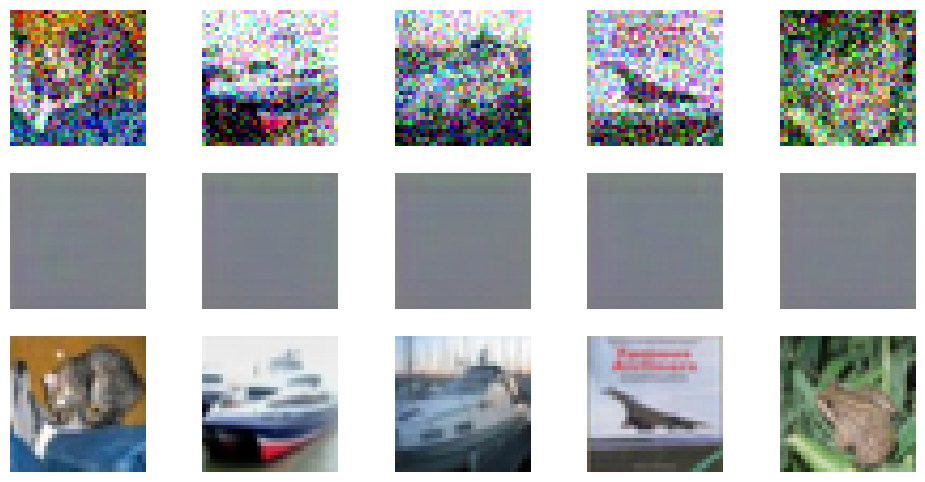

In [10]:
# Predict and visualize
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 5
plt.figure(figsize=(12, 6))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.axis('off')

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i])
    ax.axis('off')
plt.show()